In [2]:
from imagecluster import main

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
main.main(r"C:\Eamon\Python Studies\PetFinder_Scraper\petfinder_image_data", sim=0.7)

loading fingerprints database C:\Eamon\Python Studies\PetFinder_Scraper\petfinder_image_data\imagecluster\fingerprints.pk ...
clustering ...
cluster dir: C:\Eamon\Python Studies\PetFinder_Scraper\petfinder_image_data\imagecluster\clusters
items per cluster : number of such clusters
2 : 713
3 : 310
4 : 191
5 : 122
6 : 70
7 : 60
8 : 45
9 : 35
10 : 25
11 : 21
12 : 19
13 : 11
14 : 11
15 : 13
16 : 9
17 : 8
18 : 11
19 : 6
20 : 4
21 : 5
22 : 4
23 : 4
24 : 4
25 : 3
26 : 2
27 : 6
29 : 3
30 : 1
31 : 2
32 : 1
33 : 1
35 : 1
36 : 1
37 : 1
38 : 1
39 : 1
40 : 3
41 : 3
42 : 2
43 : 1
45 : 1
46 : 3
54 : 1
55 : 1
57 : 1
65 : 1
69 : 1
70 : 2
72 : 2
73 : 1
79 : 1
80 : 1
81 : 1
85 : 1
94 : 1
99 : 1
100 : 1
101 : 1
109 : 1
112 : 1
133 : 1
136 : 1
138 : 1
152 : 1
285 : 1
301 : 1
313 : 1
1098 : 1
1826 : 1
3056 : 1
3736 : 1


Clustering @ 0.6 produces an overloaded cluster of 21k images, and a number of interesting clusters of fewer images including: Fuzzy cats, siamese, white cats, etc.

Clustering @ 0.7 produces clusters of reasonable size (Not too many 2- to 15-image clusters, many between 15 and 313 images) and only ~ 10,000 images are in clusters of >1000. These clusters seem to be fairly well defined anyway.

Actually the larger clusters seem to be more uniform

In [16]:
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
a = np.arange(1,10)

In [15]:
np.random.permutation?

In [79]:
def show_random_selection(data_dir, sym_link_dir, n=3, title='Random sample from a single cluster of images'):
    fnames = np.array(
                      [os.path.join(data_dir, fname) 
                       for fname in os.listdir(sym_link_dir)])
    fnames = np.random.permutation(fnames)[:(n*n)]  
        
    fig=plt.figure(figsize=(n*4, n*4))
    columns = n
    rows = n
    fig.suptitle(title)
    for i in range(1, columns*rows+1):
        img = image.load_img(fnames[i-1], target_size=(150, 150))
        fig.add_subplot(rows, columns, i)

        plt.imshow(img)
    
    

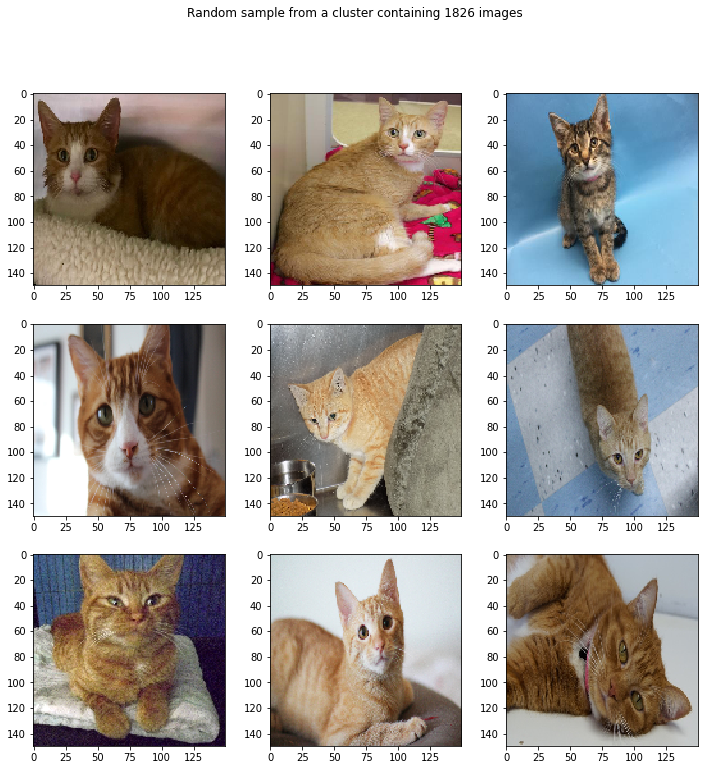

In [82]:
show_random_selection(r"C:\Eamon\Python Studies\PetFinder_Scraper\petfinder_image_data",
                      r"C:\Eamon\Python Studies\PetFinder_Scraper\petfinder_image_data\imagecluster\clusters\cluster_with_1826\cluster_0",
                      title="Random sample from a cluster containing 1826 images")

Above, we have images resized to 150x150 pixels, randomly selected from one of the larger clusters. All of them are tabbys, and almost all of them are orange tabbys. This demonstrates that there exists information in these images to classify them in the sorts of ways that we want.